# Librerías

In [ ]:
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

## Cargando dataset

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preparación de los datos

In [ ]:
X = []
Y = []
X_temp = train_x.reshape((-1,  train_x.shape[1] * train_x.shape[2]))

In [ ]:
for i in range(10):
  contY = np.array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500])
  contY[i] = 4500
  bandera = True
  for indice in range(X_temp.shape[0]):
    if train_y[indice] == i and contY[i] > 0:
      if bandera:
        X.append(X_temp[indice].reshape((-1, train_x.shape[1] * train_x.shape[2])))
        Y.append(train_y[indice].reshape((-1, 1)))
        bandera = False
        contY[i] -= 1
      else:
        X[i] = np.concatenate((X[i], X_temp[indice].reshape((-1, train_x.shape[1] * train_x.shape[2]))), axis=0)
        Y[i] = np.concatenate((Y[i], train_y[indice].reshape((-1, 1))), axis=0)
        contY[i] -= 1
    elif train_y[indice] != i and contY[train_y[indice]] > 0:
      if bandera:
        X.append(X_temp[indice].reshape((-1, train_x.shape[1] * train_x.shape[2])))
        Y.append(train_y[indice].reshape((-1, 1)))
        bandera = False
        contY[train_y[indice]] -= 1
      else:
        X[i] = np.concatenate((X[i], X_temp[indice].reshape((-1, train_x.shape[1] * train_x.shape[2]))), axis=0)
        Y[i] = np.concatenate((Y[i], train_y[indice].reshape((-1, 1))), axis=0)
        contY[train_y[indice]] -= 1
  unos = np.ones((X[i].shape[0], 1))
  X[i] = np.hstack((unos, X[i]))
  Y[i] = np.where(Y[i] == i, 1, -1)
  # print(X[i].shape)
  # print(Y[i].shape)

# Inicialización de pesos

In [ ]:
np.random.seed(1)
W_list = []

## Función signo

In [ ]:
def signo(x):
  return (x >= 0) * 2 - 1

## Función de entrenamiento

In [ ]:
def entrenamientoPerceptron(X, Y, epocas=10, alpha=0.01):
    W = np.random.random((X.shape[1], 1)) * 0.2 - 0.1  # Inicializar pesos
    for epoca in range(epocas):
        # Mezclar los datos para cada época
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in indices:
            Xi = X[i].reshape(1, -1)
            Yobtenida = signo(np.dot(Xi, W))
            error = Y[i] - Yobtenida
            W += alpha * error * Xi.T  # Actualización de pesos
    return W

In [ ]:
# Entrenamiento de los 10 perceptrones
for clase in range(10):
  print(f"Entrenando perceptrón para la clase {clase}...")
  W = entrenamientoPerceptron(X[clase], Y[clase], epocas=100, alpha=0.01)
  W_list.append(W) # Guardamos el vector de pesos entrenado para cada clase

Entrenando perceptrón para la clase 0...
Entrenando perceptrón para la clase 1...
Entrenando perceptrón para la clase 2...
Entrenando perceptrón para la clase 3...
Entrenando perceptrón para la clase 4...
Entrenando perceptrón para la clase 5...
Entrenando perceptrón para la clase 6...
Entrenando perceptrón para la clase 7...
Entrenando perceptrón para la clase 8...
Entrenando perceptrón para la clase 9...


In [ ]:
# Convertir W_list a una matriz para usar con argmax
W = np.hstack(W_list)

## Función para calcular la precisión usando argmax

In [ ]:
def calcularPrecision(Xval, Yval, W):
  prediccionesCorrectas = 0
  clasesPrevistas = []
  for i in range(Xval.shape[0]):
    puntajes = np.dot(Xval[i], W)
    clasePrevista = np.argmax(puntajes)
    clasesPrevistas.append(clasePrevista)
    if clasePrevista == Yval[i]:
      prediccionesCorrectas += 1
  precision = prediccionesCorrectas / Xval.shape[0]
  return precision, np.array(clasesPrevistas)

### Preparar el conjunto de validación

In [ ]:
Xval = test_x.reshape((-1, test_x.shape[1] * test_x.shape[2]))
Xval = np.hstack((np.ones((Xval.shape[0], 1)), Xval))
Yval = test_y

In [ ]:
# Calcular y mostrar la precisión en el conjunto de validación
precision, clasesPrevistas = calcularPrecision(Xval, Yval, W)
print(f"Exactitud en el conjunto de validación: {precision * 100:.2f}%")

Exactitud en el conjunto de validación: 84.71%


## Generar y mostrar la de confusión

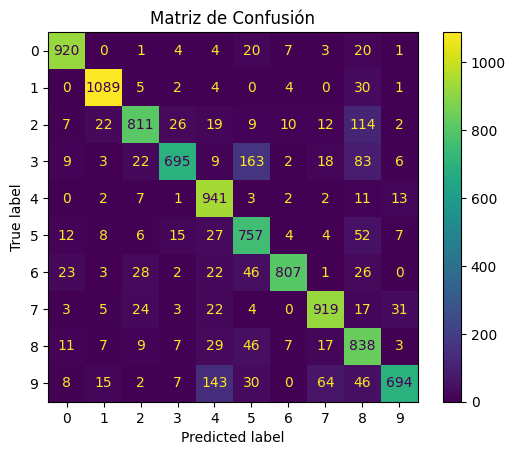

In [ ]:
mc = confusion_matrix(Yval, clasesPrevistas)
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=range(10))
disp.plot(cmap='viridis')
plt.title('Matriz de Confusión')
plt.show()

## Generar el reporte de clasificación

In [ ]:
reporte = classification_report(Yval, clasesPrevistas, target_names=[str(i) for i in range(10)])
print("Reporte de Clasificación:")
print(reporte)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       980
           1       0.94      0.96      0.95      1135
           2       0.89      0.79      0.83      1032
           3       0.91      0.69      0.78      1010
           4       0.77      0.96      0.85       982
           5       0.70      0.85      0.77       892
           6       0.96      0.84      0.90       958
           7       0.88      0.89      0.89      1028
           8       0.68      0.86      0.76       974
           9       0.92      0.69      0.79      1009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



## Función para mostrar las predicciones

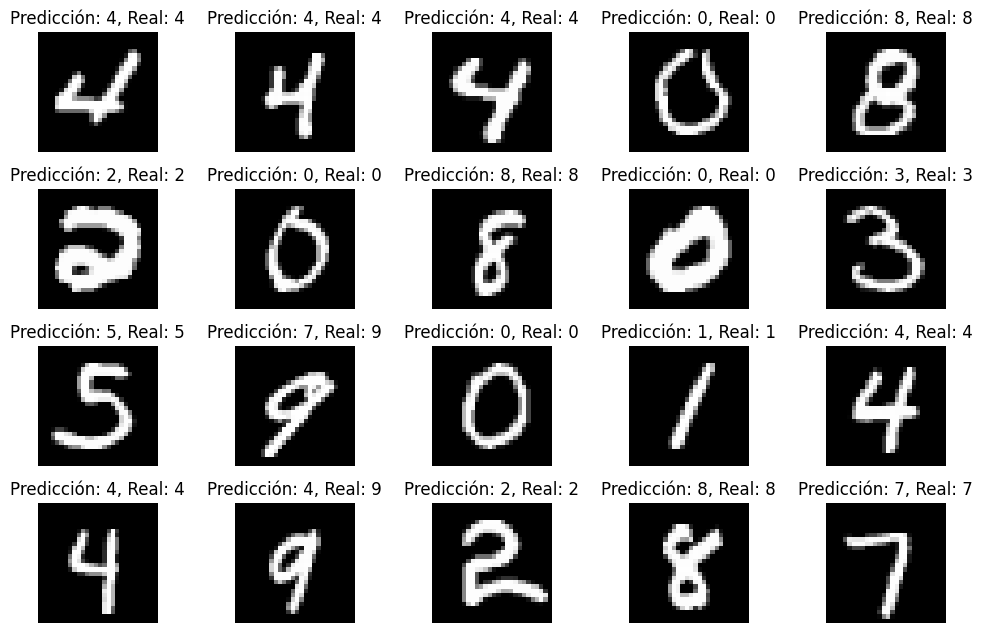

In [ ]:
def visualizarPredicciones(Xval, Yval, W, testImg, numExam=10):
  cols = 5
  rows = (numExam + cols - 1) // cols
  plt.figure(figsize=(10, 2 * rows))
  indices = np.random.choice(Xval.shape[0], numExam, replace=False)
  for i, idx in enumerate(indices):
    puntajes = np.dot(Xval[idx], W)
    clasesPrevista = np.argmax(puntajes)
    claseVerdadera = Yval[idx]
    plt.subplot(5, cols, i + 1)
    plt.imshow(testImg[idx], cmap='gray')
    plt.title(f"Predicción: {clasesPrevista}, Real: {claseVerdadera}")
    plt.axis('off')

  plt.tight_layout()
  plt.show()

visualizarPredicciones(Xval, Yval, W, test_x, numExam=20)